In [102]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
df027740 = yf.Ticker("027740.KS").history(period="max").reset_index()
df276730 = yf.Ticker("276730.KQ").history(period="max").reset_index()
df043650 = yf.Ticker("043650.KQ").history(period="max").reset_index()
df000080 = yf.Ticker("000080.KS").history(period="max").reset_index()
df005300 = yf.Ticker("005300.KS").history(period="max").reset_index()

In [90]:
df027740["Symbol"] = "027740.KS"
df276730["Symbol"] = "276730.KS"
df043650["Symbol"] = "043650.KS"
df000080["Symbol"] = "000080.KS"
df005300["Symbol"] = "005300.KS"

In [132]:
symbols = ["027740.KS", "276730.KS", "043650.KS", "000080.KS", "005300.KS"]

In [91]:
df = pd.concat([df027740, df276730, df043650, df000080, df005300])
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol
0,2000-12-08,615.816711,615.816711,580.694099,615.816711,3494382,0.0,0.0,027740.KS
1,2000-12-11,679.037463,688.403464,571.328060,583.035583,6229116,0.0,0.0,027740.KS
2,2000-12-12,599.426120,636.890253,550.254465,590.060120,5820425,0.0,0.0,027740.KS
3,2000-12-13,590.060105,627.524236,552.595973,578.352539,3673659,0.0,0.0,027740.KS
4,2000-12-14,561.962054,583.035622,554.937531,557.279053,1618050,0.0,0.0,027740.KS


<AxesSubplot:xlabel='Date', ylabel='Close'>

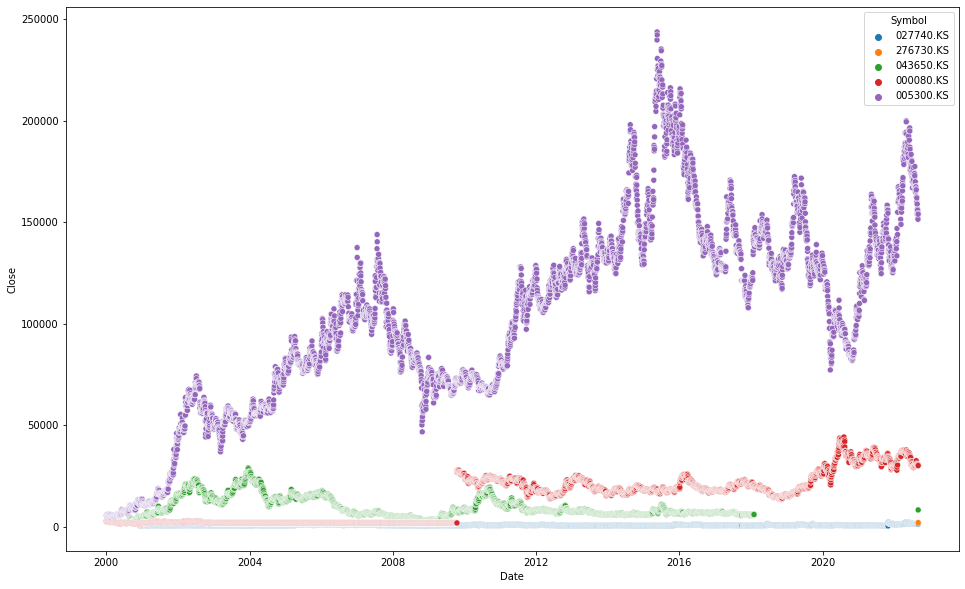

In [97]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df, x="Date", y="Close", hue="Symbol")

027740.KS 0.055367263779947516
027740.KS 0.4833333476435964
027740.KS 0.20577613984876558
027740.KS 0.016666634468573697
027740.KS 0.11440678410085726
027740.KS -0.06161136468762234
027740.KS 0.10239360378754826
027740.KS 0.14416478515353492
027740.KS 0.17518244862605054
027740.KS 0.4193548520952524
027740.KS -0.04578313253012048
000080.KS 0.4087500713520952
000080.KS 0.0641026655324172
000080.KS 0.0
000080.KS 0.0
000080.KS 0.0
000080.KS -0.004709905570003169
000080.KS -0.1918682295027591
000080.KS 0.02885248169062666
000080.KS 0.14924920803310734
000080.KS -0.25512975570360336
000080.KS 0.2531695166706201
000080.KS 0.0382273404628331
005300.KS 0.30782070081879054
005300.KS 0.5710886683948327
005300.KS 0.16725355692323982
005300.KS 0.13935369354837077
005300.KS -0.07350760798786211
005300.KS 0.3394052294633146
005300.KS 0.05592516040698656
005300.KS 0.015579944980440467
005300.KS 0.14939250111866506
005300.KS 0.19225152689307545
005300.KS 0.22331744068416673
005300.KS 0.277114210358056

/Users/derrick/miniconda3/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/derrick/miniconda3/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

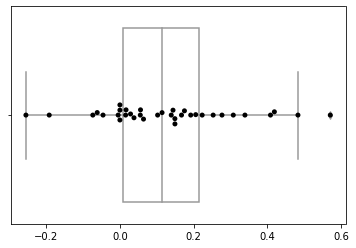

In [211]:
growths = list()
for symbol in ["027740.KS", "276730.KS", "000080.KS", "005300.KS"]:
    for year in range(2000, 2022):
        price1 = df[(df.Symbol == symbol) & (df.Date == f"{year}-11-01")].Close.to_list()
        price2 = df[(df.Symbol == symbol) & (df.Date == f"{year+1}-05-31")].Close.to_list()
        if price1 and price2:
            print(symbol, (price2[0] - price1[0]) / price2[0])
            growths.append((price2[0] - price1[0]) / price2[0])
sns.boxplot(growths, color="w")
sns.swarmplot(growths, color="k")